<a href="https://colab.research.google.com/github/HaniaRangel/SIM_MAT/blob/main/Examen1_RangelHania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su **capacidad de interpretar los resultados**. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
# Primer punto. Optimización de funciones con `SymPy` (3.4 puntos)

**Volumen mínimo**. Considere un cono circular recto circunscrito en una esfera de radio $r$:

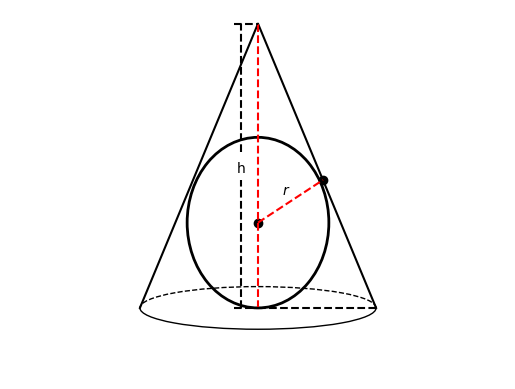

In [35]:
#@markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, 0), 2,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, 0), 2,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0.6), 0.6,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([1,0,-1],[0,2,0],'k')
plt.plot([0,0],[0,2],'--r')
plt.plot([-0.2,0],[0,0],'--k')
plt.plot([-0.2,0],[2,2],'--k')
plt.plot([-0.14,-0.14],[0,0.9],'--k')
plt.plot([-0.14,-0.14],[1.1,2],'--k')
plt.plot([0,0.55],[0.6,0.9],'--r')
plt.scatter([0,0.55],[0.6,0.9],c='k')
plt.plot([0,1],[0,0],'--k')

plt.text(-0.18,0.95,'h')
plt.text(0.2,0.8,'$r$')

plt.axis([-2.1,2.1,-0.5,2.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (1.4 puntos)
---

Para que tenga sentido y el radio y la altura sean exclusivamente dependientes entonces se debe considerara el radio de la base constante, pues si no para mismo radio de la esfera existen infinitas posibles alturas.  

La fórmula para calcular el volumen de un cono es:
$$
V=\frac{1}{3}\pi \rho^2 h
$$
donde $\rho$ es el radio de la base, la cual en nuestro caso consideramos constante.  

Nuestro primer paso será entonces tratar de buscar una manera de relacionar este valor de $\rho$ con el de $r$ para poder expresar el Volúmen sin depender de el.

Para ello, tomamos el gráfico que describe el problema y notamos que la mitad del cono (visto desde un corte transversal) es un triángulo rectángulo, y que si tomamos el radio que "toca" la pared del cono, en realidad también se forma otro triángulo rectángulo, y ambos comparten el mismo angulo en la punta del cono, lo cual significa que son semejantes.

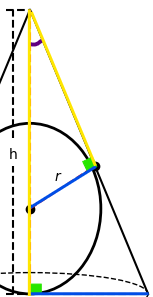

Sabiendo que estos dos triángulos son semejantes (ambos tienen un ángulo rectángulo y comparten el ángulo representado en morado) podemos establecer relaciónes entre sus lados, específicamente entre sus catetos:  
$$
\frac{\rho}{r}=\frac{h}{\sqrt{(h-r)^2-r^2}}\\
$$
Elevamos al cuadrado ambos lados y despejamos $\rho^2$:
$$
\rho^2=\frac{h^2r^2}{(h-r)^2-r^2}=\frac{h^2r^2}{h^2-2hr}=\frac{hr^2}{h-2r}\\
$$
Ya con ello, lo sustituímos en la fórmula del volumen:
$$
V(h)=\frac{\pi h^2r^2}{3(h-2r)}\\
$$

2. Determinar el valor de $h$ que minimiza el volumen para un radio $r=2$. (1 punto)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
r,h = sym.symbols('r,h')

In [37]:
def V(h):
  return np.pi*h**2*r**2/3/(h-2*r)
V(h)

1.0471975511966*h**2*r**2/(h - 2*r)

In [38]:
r=2
dV=V(h).diff()
c=sym.solve(dV,h)
c #tomamos c[1] porque la solución donde h=0 es trivial

[0.0, 8.00000000000000]

/tmp/ipython-input-78060726.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.pi*h**2*r**2/3/(h-2*r)


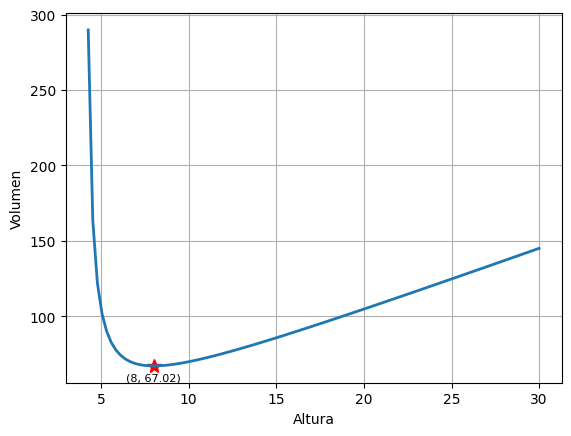

In [39]:
plt.plot(c[1],V(c[1]),'r*', ms=10)
plt.text(c[1]-1.6,V(c[1])-10,f'({c[1]:.0f}, {V(c[1]):.2f})', fontsize=8)
h_num=np.linspace(2*r,30,100) #por a la geometría del problema, sabemos que h>2r
plt.plot(h_num,V(h_num), lw=2)
plt.xlabel('Altura')
plt.ylabel('Volumen')
plt.grid()

El volumen del cono se minimiza cuando su altura es de $8 \mathrm{u}$, y su valor es de $67.02 \mathrm{u^3}$.

3. ¿Cuál es el área mínima del cono? (1 punto)
---

El área de un cono es la suma del área de su base (un círculo) y su área lateral. La fórmula en este caso se expresa como:  
$$
A_{total}=A_{base}+A_{lateral}\\
$$
con:
$A_{base}=\pi \rho^2$ y $A_{lateral}=\pi \rho \sqrt{\rho^2+h^2}$.  

Nuevamente, sustituímos $\rho^2=\frac{hr^2}{h-2r}$ (previamente calculado) y obtenemos lo siguiente:  
$$
A_{base}=\pi \rho^2=\pi \frac{hr^2}{h-2r}\\
A_{lateral}=\pi \rho \sqrt{\rho^2+h^2}=\pi \sqrt{\frac{hr^2}{h-2r}}\sqrt{\frac{hr^2}{h-2r}+h^2}=\pi \sqrt{\frac{hr^2}{h-2r}}\sqrt{\frac{hr^2+h^2(h-2r)}{h-2r}}=\pi\frac{\sqrt{h}r}{\sqrt{h-2r}}\frac{\sqrt{h} \sqrt{h^2-2hr+r^2}}{\sqrt{h-2r}}=\frac{\pi hr \sqrt{(h-r)^2}}{h-2r}=\frac{\pi hr |h-r|}{h-2r}\\
$$
De nuevo, sabemos que $h>2r$, por lo tanto $h-r>r$, o sea, mayor a cero. Es decir, el valor absoluto en $|h-r|$ no es necesario.  
$$
A_{lateral}=\frac{\pi hr (h-r)}{h-2r}=\frac{\pi r (h^2-hr)}{h-2r}\\
$$

---  
Sumando ambas áreas para obtener la total resulta en:  
$$
A_{total}=\pi \frac{hr^2}{h-2r}+\frac{\pi r (h^2-hr)}{h-2r}=\frac{\pi r(hr+h^2-hr)}{h-2r}=\frac{\pi rh^2}{h-2r}\\
$$

In [40]:
def A(h):
  return np.pi*r*h**2/(h-2*r)
A(h) #seguimos considerando r=2 como en el ejercicio anterior

6.28318530717959*h**2/(h - 4)

In [41]:
dA=A(h).diff()
c=sym.solve(dA,h)
c #tomamos c[1] porque la solución donde h=0 es trivial

[0.0, 7.99999999999999]

/tmp/ipython-input-1083660361.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.pi*r*h**2/(h-2*r)


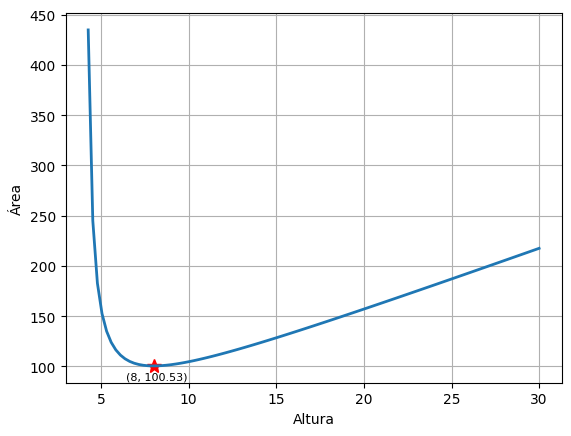

In [42]:
plt.plot(c[1],A(c[1]),'r*', ms=10)
plt.text(c[1]-1.6,A(c[1])-14,f'({c[1]:.0f}, {A(c[1]):.2f})', fontsize=8)
h_num=np.linspace(2*r,30,100)
plt.plot(h_num,A(h_num), lw=2)
plt.xlabel('Altura')
plt.ylabel('Área')
plt.grid()

Al igual que el volumen, el área del cono se minimiza cuando su altura es de $8 \mathrm{u}$, y en este caso su valor es de $100.53 \mathrm{u^2}$.

---
# Segundo punto. Programación lineal (3.4 puntos)
Una fábrica de confitería está interesada en mezclar tres de sus marcas principales de golosinas (M1, M2, M3) para obtener tres nuevos productos (P1, P2, P3), que desea vender al precio de 4,3,2 u.m. por caja, respectivamente.
La empresa puede importar 2000 cajas de M1, 4000 de la M2 y 1000 de la M3, siendo el precio que debe pagar de 3,2 y 1 u.m. por cada tipo de caja.

El proveedor solicita que el Producto 1 (P1) contenga como mínimo el 80% de M1 y como máximo el 20% de M3. El producto 2 (P2) deberá contener como mínimo el 20% de M1 y no más del 80% de M3. El producto 3 (P3) no podrá contener más del 70% de M3.

Encuentre la combinación que le genere el **máximo** beneficio (precio de venta menos el costo).

Use las variables $x_{ij}$: Como la cantidad de la marca $i$ en el producto $j$.

1. Escriba la función objetivo a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas de $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(2.2 puntos)}
\end{equation}
---

Primero definimos las variables como indicado:

+ $x_{11}$: Cantidad de la marca $M1$ en el producto $1$.
+ $x_{12}$: Cantidad de la marca $M1$ en el producto $2$.
+ etc...

y con ello podemos expresar la función objetivo, la cual es maximizar el beneficio (precio de venta menos el costo) considerando las restricciónes dadas en el problema:  

$$
\max_{x_{ij}}4(x_{11}+x_{21}+x_{31})+3(x_{12}+x_{22}+x_{32})+2(x_{13}+x_{23}+x_{33})-[3(x_{11}+x_{12}+x_{13})+2(x_{21}+x_{22}+x_{23})+1(x_{31}+x_{32}+x_{33})]\\
$$

Esta ecuación se puede cambiar para calcular un mínimo seguir siendo equivalente (costo menos precio de venta):

$$
\min_{x_{ij}}3(x_{11}+x_{12}+x_{13})+2(x_{21}+x_{22}+x_{23})+1(x_{31}+x_{32}+x_{33})-[4(x_{11}+x_{21}+x_{31})+3(x_{12}+x_{22}+x_{32})+2(x_{13}+x_{23}+x_{33})]\\
$$

Esto se desarrolla hasta llegar a:

$$
\min_{x_{ij}}-x_{11}+x_{13}-2x_{21}-x_{22}-3x_{31}-2x_{32}-x_{33}\\
$$

Ahora, se consideran las restricciónes para cada producto (cajas de M1, M2 y M3 junto con los porcentajes de estos):  

**P1:**
+ $x_{11}\geq 0.8(2000)$
+ $x_{31}\leq 0.2(1000)$  

**P2**
+ $x_{12}\geq 0.2(2000)$
+ $x_{32}\leq 0.8(1000)$  

**P3**
+ $x_{33}\leq 0.7(1000)$  

Esos mismos numeros de importación se consideran por si mismos como otras restricciónes para cada marca:
+ $x_{11}+x_{12}+x_{13}\leq 2000$
+ $x_{21}+x_{22}+x_{23}\leq 4000$
+ $x_{31}+x_{32}+x_{33}\leq 1000$

Esto en código se vería así:

In [43]:
import numpy as np

In [44]:
c=np.array([-1,0,1,-2,-1,0,-3,-2,-1])
A=np.array([[-1,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,1,0,0],
            [0,-1,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,1,0],
            [0,0,0,0,0,0,0,0,1],
            [1,1,1,0,0,0,0,0,0],
            [0,0,0,1,1,1,0,0,0],
            [0,0,0,0,0,0,1,1,1]])
b=np.array([-1600,200,-400,800,700,2000,4000,1000])

2. Resuelva el problema utilizando la función `linprog`. ¿Cuál es la combinación óptima para cada producto?, ¿Cuál es el beneficio que se genera? (1.2 puntos)

In [45]:
import scipy.optimize as opt
opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -11800.0
              x: [ 1.600e+03  4.000e+02  0.000e+00  4.000e+03  0.000e+00
                   0.000e+00  2.000e+02  8.000e+02 -0.000e+00]
            nit: 1
          lower:  residual: [ 1.600e+03  4.000e+02  0.000e+00  4.000e+03
                              0.000e+00  0.000e+00  2.000e+02  8.000e+02
                             -0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  2.000e+00  0.000e+00
                              1.000e+00  2.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  

El valor obtenido en `fun` representala respuesta a nuestra función objetivo, o sea, se genera el máximo beneficio con $11,800 \mathrm{u.m.}$ generados el combinar Marcas y Productos de la siguiente manera:  
$P1$: $1600\ M1$, $4000\ M2$ y $200\ M3$  
$P2$: $400\ M1$ y $800\ M3$  
$P3$: no comprar

---
# Tercer punto. Ajuste de curvas (3.4 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001.

In [46]:
import pandas as pd

date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban=pd.DataFrame(date_rng, columns=['date'])
ban = ban.set_index('date')
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
ban

/tmp/ipython-input-1613858795.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')


,values
date,
1988-12-31,594.6
1989-12-31,643.0
1990-12-31,725.5
1991-12-31,880.4
1992-12-31,972.5
1993-12-31,918.7
1994-12-31,845.3
1995-12-31,858.1
1996-12-31,1042.1


1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores cuadráticos de forma gráfica, ¿Qué polinómio se ajusta mejor? (2 puntos)
---

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
x_orig=date_rng.to_numpy()
#es necesario cambiar x de DatetimeArray a un array de NumPy
x=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13]) # ~ x=x_orig-x_orig[0]
y=ban['values']

In [49]:
def fhat(b,x):
    X=np.array([x**i for i in range(len(b))]).T
    return X@b

In [50]:
def error(b,x,y):
    return np.sum((y-fhat(b,x))**2)

In [51]:
# Minimización del error
b_inicial_1=np.random.rand(2)
sol_1=opt.minimize(error, b_inicial_1, args=(x, y))
b_opt_1=sol_1.x

b_inicial_2=np.random.rand(3)
sol_2=opt.minimize(error, b_inicial_2, args=(x, y))
b_opt_2=sol_2.x

b_inicial_3=np.random.rand(4)
sol_3=opt.minimize(error, b_inicial_3, args=(x, y))
b_opt_3=sol_3.x

b_inicial_4=np.random.rand(5)
sol_4=opt.minimize(error, b_inicial_4, args=(x, y))
b_opt_4=sol_4.x

b_inicial_5=np.random.rand(6)
sol_5=opt.minimize(error, b_inicial_5, args=(x, y))
b_opt_5=sol_5.x

In [52]:
# Error acumulado
error_ac=[sol_1.fun, sol_2.fun, sol_3.fun, sol_4.fun, sol_5.fun]
grados=[1,2,3,4,5]

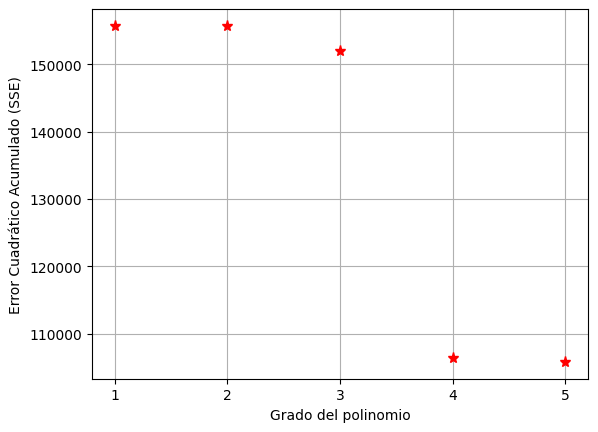

In [53]:
plt.plot(grados, error_ac, 'r*', ms=8)
plt.xticks(grados)
plt.xlabel('Grado del polinomio')
plt.ylabel('Error Cuadrático Acumulado (SSE)')
plt.grid()

Basados en el error cuadrático el **polinomio de grado 5** debería ajustarse mejor.

2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (0.7 puntos)

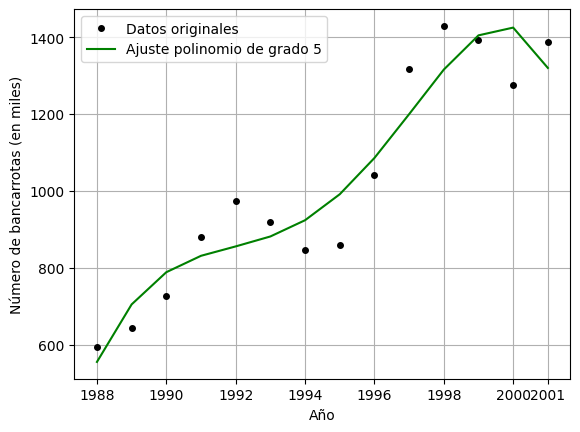

In [54]:
plt.plot(x, y, 'ko', ms=4, label='Datos originales')
yfit_5=fhat(b_opt_5, x)
plt.plot(x, yfit_5, 'g-', label='Ajuste polinomio de grado 5')

# etiquetas
etiquetas_x=[1988, 1990, 1992, 1994, 1996, 1998, 2000, 2001]
posiciones_x=[a-1988 for a in etiquetas_x]
plt.xticks(posiciones_x, etiquetas_x)

plt.xlabel('Año')
plt.ylabel('Número de bancarrotas (en miles)')
plt.legend()
plt.grid()

3. Usar el modelo para averiguar el número de bancarrotas a mediados de 1995 y predecirlo para el año 2020. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (0.7 puntos)

In [55]:
def pol5(x):
  x=x-1988 #esto para poder introducir el año directamente
  return b_opt_5[0]+b_opt_5[1]*x+b_opt_5[2]*x**2+b_opt_5[3]*x**3+b_opt_5[4]*x**4+b_opt_5[5]*x**5

In [56]:
pol5(1995)

np.float64(991.2905704689874)

Para el año de 1995 probablemente hubieron alrededor de $991 \mathrm{mil}$ personas que cayeron en bancarrota, lo cual tiene sentido viendo la tendencia de los datos.

In [57]:
pol5(2020)

np.float64(-250455.39015692487)

De acuerdo con nuestro modelo, debido a la tendencia de los ultimos años se extrapola hasta obtener numeros negativos.